<a href="https://colab.research.google.com/github/Nardy07/NIDS/blob/main/try11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping


In [4]:
df= pd.read_csv('balanced_data_try.csv')

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df

,Fwd_Pkt_Len_Mean,Bwd_IAT_Tot,Bwd_IAT_Max,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts,intrusion,abnormal,Normal,Label
0,0.862912,1.164843,0.149819,1.483322,2.858391,2.085865,0.217784,2.697656,0.862912,2.420659,0,False,True,Normal
1,-0.154458,-0.380121,-0.374572,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,2.420615,0,False,True,Normal
2,0.138330,-0.378386,-0.372989,-0.026283,-0.077528,0.016422,-0.049965,-0.086238,0.138330,2.420659,0,False,True,Normal
3,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093,1,True,False,abnormal
4,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418137,1,True,False,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136843,-0.125131,2.022758,2.871826,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309,1,True,False,abnormal
136844,-0.125131,2.018876,2.866581,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309,1,True,False,abnormal
136845,-0.125131,2.030522,2.877070,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309,1,True,False,abnormal
136846,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093,1,True,False,abnormal


In [8]:
X = df.iloc[:,0:10] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = df[['intrusion']].values # target attribute

In [9]:
X

,Fwd_Pkt_Len_Mean,Bwd_IAT_Tot,Bwd_IAT_Max,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts
0,0.862912,1.164843,0.149819,1.483322,2.858391,2.085865,0.217784,2.697656,0.862912,2.420659
1,-0.154458,-0.380121,-0.374572,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,2.420615
2,0.138330,-0.378386,-0.372989,-0.026283,-0.077528,0.016422,-0.049965,-0.086238,0.138330,2.420659
3,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093
4,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418137
...,...,...,...,...,...,...,...,...,...,...
136843,-0.125131,2.022758,2.871826,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309
136844,-0.125131,2.018876,2.866581,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309
136845,-0.125131,2.030522,2.877070,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309
136846,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093


In [10]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [11]:
X_train = X_train.values

In [12]:
y_train=np.array(y_train)

In [13]:
x_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [14]:
x_train.shape

(102636, 1, 10)

# LSTM model defining
first ko pailako save garya model

second ko chai naya layer add garera activation ma softmax used.

third ko ma similar to second tara activation ma chai sigmoid nai use.



In [32]:
#lst = Sequential() # initializing model

# FIRST ONEEE 99% accuracy

# input layer and LSTM layer with 50 neurons
#lst.add(LSTM(units=50,input_dim=10))
 #output layer with sigmoid activation
#lst.add(Dense(1, activation='sigmoid'))

# SECOND ONE 50%

#lst.add(LSTM(units=50, return_sequences=True, input_dim=10))
#lst.add(Dropout(0.2))
#lst.add(LSTM(units=50, return_sequences=True))
#lst.add(Dropout(0.2))
#lst.add(LSTM(units=50))
#lst.add(Dropout(0.2))
#lst.add(Dense(1, activation='softmax')) <-------- esma activation function change garera accuracy ghatna sakya huna sakcha

# THIRD ONE 98-99%

lst = Sequential([LSTM(64, input_dim=10, return_sequences=True),Dropout(0.2),LSTM(64),Dropout(0.2),Dense(1, activation='sigmoid')])


In [33]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
# summary of model layers
lst.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 64)          19200     
                                                                 
 dropout_6 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 52289 (204.25 KB)
Trainable params: 52289 (204.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=10, batch_size=16,validation_split=0.2)

Epoch 1/10
5132/5132 [==============================] - 38s 7ms/step - loss: 0.0399 - accuracy: 0.9905 - val_loss: 0.0352 - val_accuracy: 0.9912
Epoch 2/10
5132/5132 [==============================] - 40s 8ms/step - loss: 0.0392 - accuracy: 0.9907 - val_loss: 0.0365 - val_accuracy: 0.9924
Epoch 3/10
5132/5132 [==============================] - 44s 9ms/step - loss: 0.0390 - accuracy: 0.9907 - val_loss: 0.0344 - val_accuracy: 0.9916
Epoch 4/10
5132/5132 [==============================] - 42s 8ms/step - loss: 0.0388 - accuracy: 0.9910 - val_loss: 0.0352 - val_accuracy: 0.9918
Epoch 5/10
5132/5132 [==============================] - 46s 9ms/step - loss: 0.0383 - accuracy: 0.9910 - val_loss: 0.0346 - val_accuracy: 0.9919
Epoch 6/10
5132/5132 [==============================] - 30s 6ms/step - loss: 0.0383 - accuracy: 0.9910 - val_loss: 0.0352 - val_accuracy: 0.9919
Epoch 7/10
5132/5132 [==============================] - 31s 6ms/step - loss: 0.0381 - accuracy: 0.9911 - val_loss: 0.0338 - val_ac

In [37]:
X_test = X_test.to_numpy()
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [38]:
from keras.models import model_from_json # saving and loading trained model

filepath = 'lst_binary.json'
weightspath = 'lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [39]:
# load json and create model
json_file = open(filepath, 'r')
loaded_model_json = json_file.read()
json_file.close()
lst = model_from_json(loaded_model_json)

# load weights into new model
lst.load_weights(weightspath)
print("Loaded model from disk")

Loaded model from disk


In [40]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

1070/1070 [==============================] - 4s 3ms/step - loss: 0.0322 - accuracy: 0.9930
Test results - Loss: 0.032191094011068344 - Accuracy: 99.29556846618652%


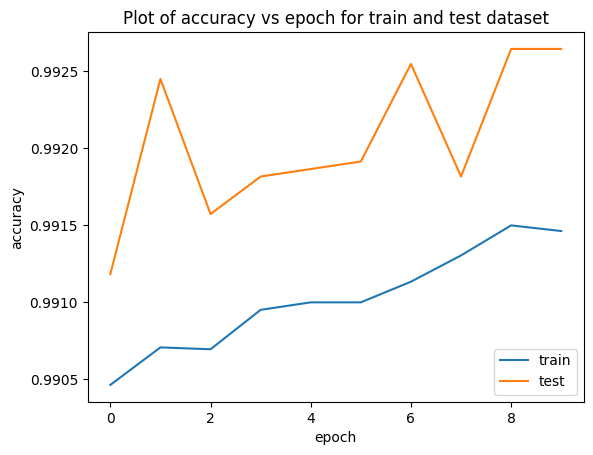

In [42]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('lstm_binary_accuracy.png')
plt.show()

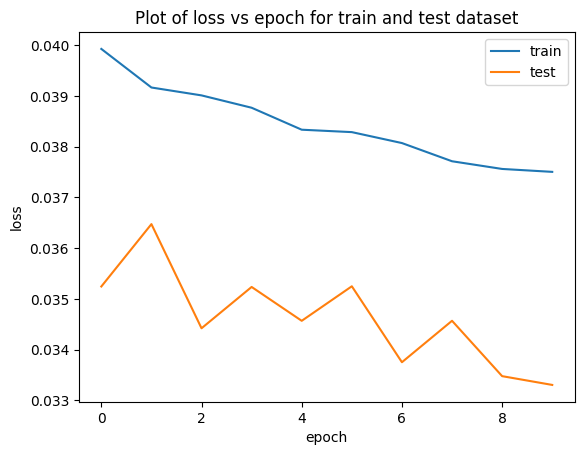

In [43]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('lstm_binary_loss.png')
plt.show()

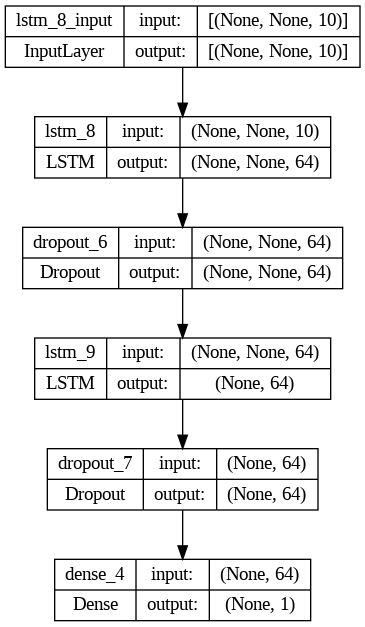

In [44]:
from keras.utils import plot_model
# representation of model layers
plot_model(lst, to_file='lstm_binary.png', show_shapes=True,)

In [45]:
y_test.shape

(34212, 1)

In [46]:
y_pred = lst.predict(x_test)

1070/1070 [==============================] - 3s 2ms/step


In [47]:
y_pred.shape

(34212, 1)

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

1070/1070 [==============================] - 3s 2ms/step


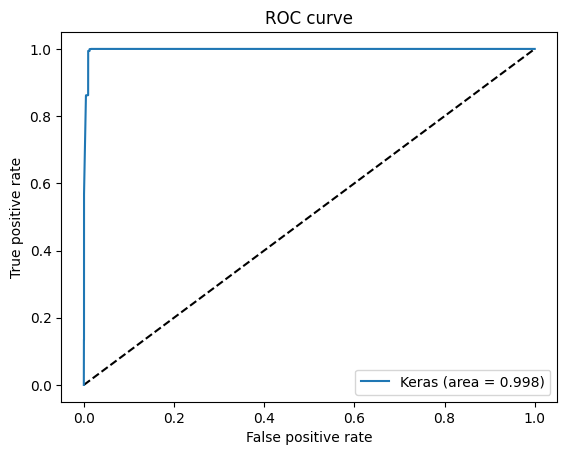

In [49]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('lstm_binary_roc.png')
plt.show()

In [50]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

1070/1070 [==============================] - 3s 3ms/step


In [51]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9995921934168366
F1 Score -  0.9930260149897272
Precision Score -  0.9865455381784729
